In [1]:
import os
import numpy as np
import pandas

import matplotlib.pyplot as plt
import glob
import json

import networkx as nx
from community import community_louvain

## Graph analysis

We first download a specific json file corresponding to a given graph.

In [ ]:
def _makeG(dic):
    
    G=nx.Graph()
    _Cells = _Sph['cells']
    G.add_nodes_from(_Cells.keys())
    
    for key in _Cells.keys():
    
        neighbours = _Cells[key]['neighbours']
    
        for node in neighbours:
    
            G.add_edge(key, node)
        
    return G

In [92]:
n = 0
path = r'X:\Gustave\Experiments\Nuclei Segmentation\04072019\Seb\tif\Spheroids'

In [93]:
dicName = glob.glob(path + r'\**\**\\' + '*.json')[n]

IndexError: list index out of range

In [ ]:
with open(dicName, "r") as read_file:
    _Sph = json.load(read_file)

In [ ]:
G = _makeG(_Sph)

### Library of possible analysis functions

In the following lines we give the main features we will be looking at among our spheroids.

In [ ]:
A = nx.betweenness_centrality(G)

In [ ]:
B = networkx.clustering(G)

In [ ]:
C = community_louvain.best_partition(G)

### Spring Plot

This enables us to clearly view the spheroid in 2D. There are issues with the colorbar,

In [ ]:
import re
import sys

import matplotlib.pyplot as plt
import networkx as nx

# draw with matplotlib/pylab
plt.figure(figsize=(10,10))

# with nodes colored by degree sized by population
node_color = [float(B[v]) for v in G]

nx.draw_spring(G, node_color=node_color,
        with_labels=False)

plt.show()

### Modular plot

The following function enables us to plot any property in 2D with the spring layout. The colorbar issues has been solved here.

In [ ]:
G=nx.Graph()
_Cells = _Sph['cells']
G.add_nodes_from(_Cells.keys())

# Creating the Graph

for key in _Cells.keys():
    
    neighbours = _Cells[key]['neighbours']
    
    for node in neighbours:
    
        G.add_edge(key, node)

centrality = []
eV = nx.degree_centrality(G)

# Measuring the feature

for key in _Cells.keys():
        
    centrality.append(eV[key])
    
# Proper plot

plt.figure(figsize=(8, 8))

pos = nx.spring_layout(G)
im = nx.draw_networkx_nodes(G, pos, node_size=20, node_color = centrality, cmap=plt.cm.viridis)
nx.draw_networkx_edges(G, pos, alpha=0.4)

#legend
cbar = plt.colorbar(im)
cbar.set_label('Eigenvector centrality', rotation=270)
cbar.ax.get_yaxis().labelpad = 15

plt.axis('off')
#plt.savefig(path + '\\fig_58_5.png')
plt.show()


### 3D plot

The advantage of the 3D plot is that it enables us to precisely measure the different spheroid characteristics without modifying the cell layout.

In [138]:
import networkx as nx
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def generate_random_3Dgraph(_Cells, zRatio, dCells, scale, seed=None):

    
    # Generate a dict of positions
    pos = {int(i): (int(scale*int(float(_Cells[i]['x']))), 
               int(scale*int(float(_Cells[i]['y']))), 
               int(float(scale*float(_Cells[i]['z']))/zRatio)) for i in _Cells.keys()}
    
    # Create random 3D network
    G = nx.random_geometric_graph(len(_Cells), dCells, pos=pos)
 
    return G

def network_plot_3D(G, _Cells, angle, save=False):
 
    # Get node positions
    pos = nx.get_node_attributes(G, 'pos')
        
    # Get number of nodes
    n = G.number_of_nodes()
 
    # Get the maximum number of edges adjacent to a single node
    edge_max = max([G.degree(i) for i in range(n)])
 
    # Define color range proportional to number of edges adjacent to a single node
    colors = [_Cells[key]['color'] for key in _Cells.keys()]
 
    # 3D network plot
    with plt.style.context(('ggplot')):
        
        fig = plt.figure(figsize=(10,8))
        ax = Axes3D(fig)
        
        # Loop on the pos dictionary to extract the x,y,z coordinates of each node
        
        for i,j in enumerate(G.edges()):
 
            x = np.array((pos[j[0]][0], pos[j[1]][0]))
            y = np.array((pos[j[0]][1], pos[j[1]][1]))
            z = np.array((pos[j[0]][2], pos[j[1]][2]))
        
        # Plot the connecting lines
            ax.plot(x, y, z, c='black', alpha=0.2)
            
        x = []
        y = []
        z = []
        nodeColor = []
        s = []
            
        for key, value in pos.items():
            x.append(value[0])
            y.append(value[1])
            z.append(value[2])
            nodeColor.append(colors[key])
            s.append(20+20*G.degree(key))
            
        # Scatter plot
        sc = ax.scatter(x, y, z, c=nodeColor, s=s, edgecolors='k', alpha=0.7)
        
        # Loop on the list of edges to get the x,y,z, coordinates of the connected nodes
        # Those two points are the extrema of the line to be plotted

    
    # Set the initial view
    ax.view_init(30, angle)
    fig.patch.set_facecolor((1.0, 1, 1))
    ax.set_facecolor((1.0, 1, 1))
    ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
    plt.rc('grid', linestyle="-", color='black')
    plt.axis('off')
    
    #ax.set_xlabel('X axis ($\mu m$)')
    #ax.set_ylabel('Y axis ($\mu m$)')
    #ax.set_zlabel('Z axis ($\mu m$)')
    #ax.set_xlim(100, 250)
    #ax.set_ylim(100, 250)
    #ax.set_zlim(50, 90)
    return

In [139]:
path = r'Z:\Cold Storage\20191106\directmix\Spheroids'

dicName = path + '\spheroid_01_01.json'

with open(dicName, "r") as read_file:
    _Sph = json.load(read_file)

import networkx as nx
G=nx.Graph()
_Cells = _Sph['cells']

In [140]:
for key in _Cells.keys():
    
    if _Cells[key]['state GMM'] == 'Orange':
        
        _Cells[key]['color'] = 'r'

    if _Cells[key]['state GMM'] == 'Green':
        
        _Cells[key]['color'] = 'g'

In [141]:
G = generate_random_3Dgraph(_Cells, 1/3, 70, scale = 2, seed=None)

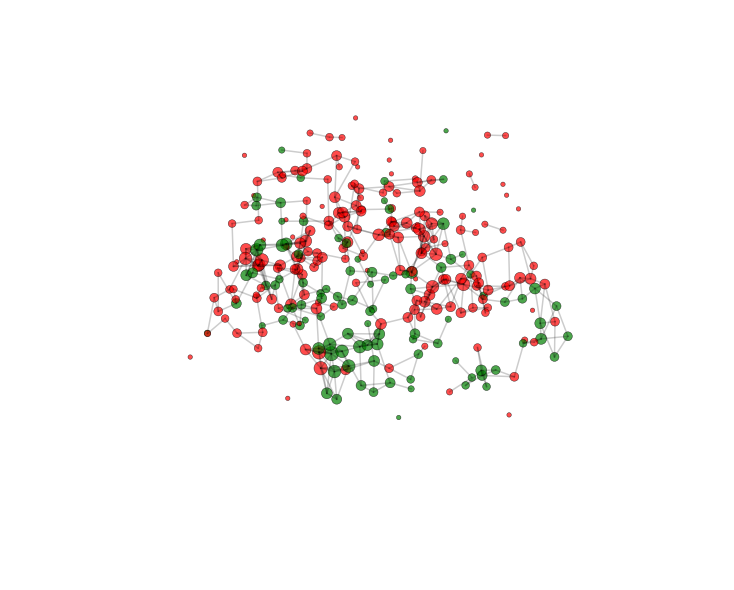

In [143]:
network_plot_3D(G, _Cells,30, save=False)

plt.savefig(path + '\\3DIllustrtion.pdf', transparent=True)
plt.show()